<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-coordinates-on-the-torus,-field-magnitude,-and-$|B|^\prime$" data-toc-modified-id="Generate-coordinates-on-the-torus,-field-magnitude,-and-$|B|^\prime$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate coordinates on the torus, field magnitude, and $|B|^\prime$</a></span></li><li><span><a href="#Field-magnitude-and-$\Sigma$-in-the-axisymmetric-case" data-toc-modified-id="Field-magnitude-and-$\Sigma$-in-the-axisymmetric-case-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Field magnitude and $\Sigma$ in the axisymmetric case</a></span></li><li><span><a href="#Perturbed-toy-tokamak" data-toc-modified-id="Perturbed-toy-tokamak-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perturbed toy tokamak</a></span><ul class="toc-item"><li><span><a href="#Compute-and-visualize-$\Sigma$-surface,-separate-$\Sigma$-into-its-3-pieces-based-on-sign-of-$|B|^{\prime-\prime}$" data-toc-modified-id="Compute-and-visualize-$\Sigma$-surface,-separate-$\Sigma$-into-its-3-pieces-based-on-sign-of-$|B|^{\prime-\prime}$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Compute and visualize $\Sigma$ surface, separate $\Sigma$ into its 3 pieces based on sign of $|B|^{\prime \prime}$</a></span></li></ul></li><li><span><a href="#Check:-root-of-$|B|^\prime$-and-sign-of-$|B|^{\prime-\prime}$-agree-for-the-axisymmetric-case" data-toc-modified-id="Check:-root-of-$|B|^\prime$-and-sign-of-$|B|^{\prime-\prime}$-agree-for-the-axisymmetric-case-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check: root of $|B|^\prime$ and sign of $|B|^{\prime \prime}$ agree for the axisymmetric case</a></span></li></ul></div>

In [1]:
import numpy as np

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from importlib import reload  # Python 3.4+
import toy_tokamak
reload(toy_tokamak)


<module 'toy_tokamak' from '/Users/OptimusPrime/Documents/magnetic-mirror/toy-tokamak/src/toy_tokamak.py'>

### Generate coordinates on the torus, field magnitude, and $|B|^\prime$

In [2]:

resolution = 100
majorRad = 1 #R0
minorRad = 0.4 #r0
# theta = np.linspace(-np.pi, np.pi, resolution) # toroidal angle
# phi = np.linspace(-np.pi, np.pi, resolution) # poloidal angle
theta = np.linspace(0, 2*np.pi, resolution) # toroidal angle
phi = np.linspace(0, 2*np.pi, resolution) # poloidal angle
theta, phi = np.meshgrid(theta, phi)
xMesh = (majorRad + minorRad*np.cos(phi))*np.cos(theta)
yMesh = (majorRad + minorRad*np.cos(phi))*np.sin(theta)
zMesh = minorRad*np.sin(phi)
    
# temp = np.array([[1,2,3],[4,5,6],[7,8,9]])
points_cart = np.concatenate([xMesh.flatten().reshape((resolution*resolution,1)), \
                         yMesh.flatten().reshape((resolution*resolution,1)), \
                         zMesh.flatten().reshape((resolution*resolution,1)),], axis = 1)


points_cyl = toy_tokamak.cart_to_cyl(points_cart)

# parameters = [R0, C, epsilon] 
field_parameters = np.array([1, 5.5, 0.02, np.NaN], dtype = float)
fieldMag = toy_tokamak.field_mag(points_cyl, field_parameters)
fieldMag = np.reshape(fieldMag, (resolution,resolution))

fieldMagAnaExp = toy_tokamak.field_mag_analytical(points_cyl, field_parameters)
fieldMagAnaExp = np.reshape(fieldMagAnaExp, (resolution,resolution))

modBprime = toy_tokamak.dfieldmag_ds(points_cyl, field_parameters)
modBprime = np.reshape(modBprime, (resolution,resolution))

# Computing the conserved quantity
r = points_cyl[:,0] - majorRad
psi = 0.5*(r**2 + points_cyl[:,2]**2).reshape((resolution, resolution))


### Field magnitude and $|B|^{\prime}$ on 2D surfaces

- Needs matplotlib version > 3.5 for set_xticks

Text(0.5, 1.0, '$|B|^{\\prime}$')

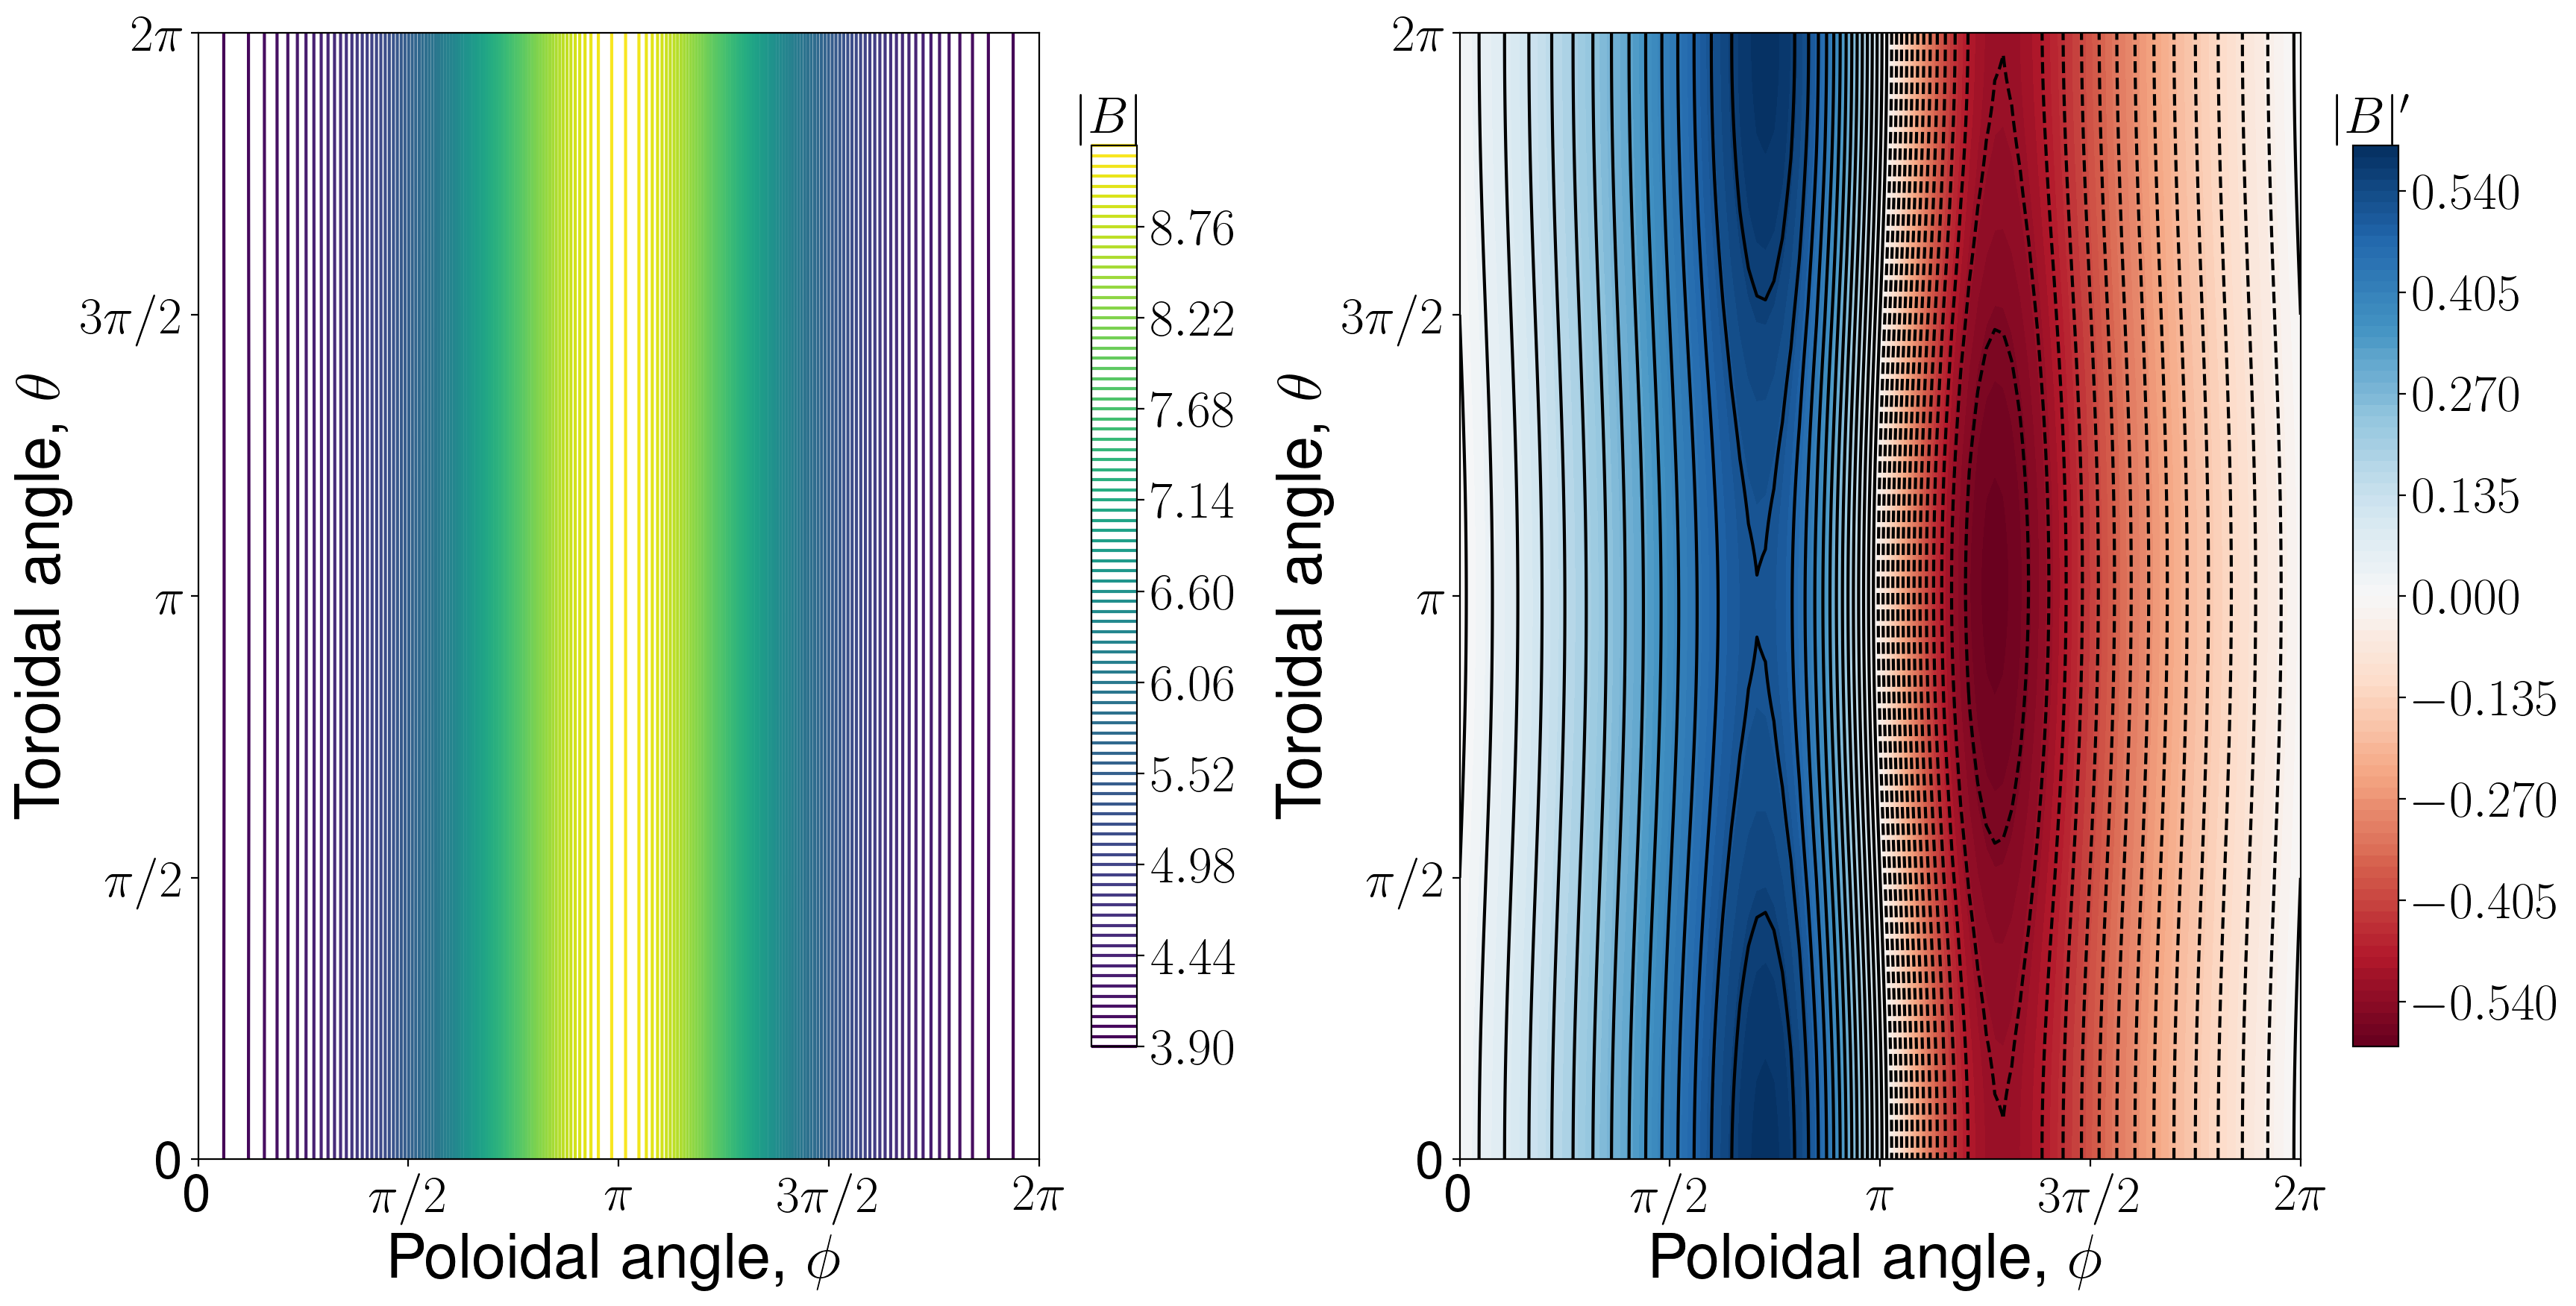

In [3]:
%matplotlib inline

tick_labelsize = 25 #10, 20
axes_labelsize = 30
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

angle_locations = np.arange(np.min(theta), np.max(theta) + np.pi/2, np.pi/2)
angle_labels = ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']

fig = plt.figure(figsize=(20,10), dpi=200)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


# cset1 = ax1.contour(phi, theta, fieldMag, levels = 100, cmap = cm.viridis)
cset1 = ax1.contour(phi, theta, fieldMag, levels = 100, cmap = cm.viridis)
# cset = ax.contour(phi, theta,  fieldMagAnaExp, levels = 100, cmap = cm.viridis)
ax1.set_xlabel(r'Poloidal angle, $\phi$')
ax1.set_ylabel(r'Toroidal angle, $\theta$')

ax1.set_xticks(angle_locations, angle_labels)
ax1.set_yticks(angle_locations, angle_labels)
# ax1.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi], \
#                ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
# ax1.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi], \
#                ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
cbar1 = fig.colorbar(cset1, ax = ax1, shrink = 0.8)
cbar1.ax.set_title(r'$|B|$', fontsize = 25)

cset2 = ax2.contourf(phi, theta, modBprime, levels = 100, cmap = cm.RdBu)
ax2.contour(phi, theta, modBprime, levels = 30, colors = 'k')
ax2.set_xlabel(r'Poloidal angle, $\phi$')
ax2.set_ylabel(r'Toroidal angle, $\theta$')

ax2.set_xticks(angle_locations, angle_labels)
ax2.set_yticks(angle_locations, angle_labels)
# ax2.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
# ax2.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi], \
#           ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
cbar2 = fig.colorbar(cset2, ax = ax2, shrink = 0.8)
cbar2.ax.set_title(r'$|B|^{\prime}$', fontsize = 25)

# plt.savefig('toy-tokamak-modB-modBprime.png', dpi = 300, \
#            bbox_inches = 'tight')
# plt.savefig('toy-tokamak-modB-modBprime.pdf', \
#            bbox_inches = 'tight')


### Perturbed toy tokamak

#### Compute $\Sigma$ surface, separate $\Sigma$ into its 3 pieces based on sign of $|B|^{\prime \prime}$

This following cell takes few minutes to substitute the coordinates in the second derivative expression

In [4]:
from scipy.optimize import newton
import toy_tokamak
reload(toy_tokamak)
import time
import sympy

R, phi, z, R0, C, epsilon = sympy.symbols('R, phi, z, R0, C, epsilon')

# perturbFieldExp = np.array([-z/R - epsilon*sympy.cos(phi)/R, C/R, (R - R0)/R])
# perturbFieldMagExp = sympy.sqrt(z**2 + epsilon**2*sympy.cos(phi)**2 + 2*epsilon*z*sympy.cos(phi) + C**2 + (R-R0)**2)/R

# incorrect
# perturbFieldExp = np.array([-z/R - epsilon*sympy.cos(phi)/R, C/R, (R - R0)/R + (epsilon*z*sympy.cos(phi))/R])
# perturbFieldMagExp = sympy.sqrt((z + epsilon*R*sympy.cos(phi))**2 + C**2 + \
#                                 ((R - R0) + epsilon*z*sympy.cos(phi))**2)/R

perturbFieldExp = np.array([-z/R - epsilon*sympy.cos(phi), C/R, (R - R0)/R + (epsilon*z*sympy.cos(phi))/R])
perturbFieldMagExp = sympy.sqrt((z + epsilon*R*sympy.cos(phi))**2 + C**2 + \
                                ((R - R0) + epsilon*z*sympy.cos(phi))**2)/R

gradFieldMagExp = [sympy.diff(perturbFieldMagExp,R), \
                   sympy.diff(perturbFieldMagExp,phi)/R, \
                   sympy.diff(perturbFieldMagExp,z)]

modBprime = np.dot(perturbFieldExp/perturbFieldMagExp,gradFieldMagExp)


gradModBPrime = [sympy.diff(modBprime,R), sympy.diff(modBprime,phi)/R, \
                 sympy.diff(modBprime,z)]

modBDoubleprime = np.dot(perturbFieldExp/perturbFieldMagExp,gradModBPrime)

modBprime_l = sympy.lambdify([R, phi, z, R0, C, epsilon], modBprime, 'numpy')

modBDoubleprime_l = sympy.lambdify([R, phi, z, R0, C, epsilon], modBDoubleprime, 'numpy')


def dmodB_ds_perturb(points, field_parameters):
    
    R0, C, epsilon = field_parameters[:3]
    
    R = points[:,0]
    phi = points[:,1]
    z = points[:,2]
    
    modBprime_lambda = modBprime_l(R, phi, z, R0, C, epsilon)
    
    return modBprime_lambda

res_guess = 100
root = np.zeros((res_guess*res_guess,3))
root_sign = np.zeros((res_guess*res_guess,1))

print(points_cyl[159:160,:], field_parameters[:3])
print('|B|^\prime for the guess point: %.6f'%(modBprime_l(points_cyl[159,0], points_cyl[159,1], points_cyl[159,2], \
                                      field_parameters[0],field_parameters[1], field_parameters[2])))


# Initial guess for the sigma surface is the unperturbed sigma
rad_guess = majorRad + np.linspace(-minorRad, minorRad, res_guess).reshape(-1,1)
phi_guess = np.linspace(-np.pi,np.pi, res_guess).reshape(-1,1)
# phi_guess = np.linspace(0,2*np.pi, res_guess).reshape(-1,1)
radMesh_guess, phiMesh_guess = np.meshgrid(rad_guess, phi_guess)
zMesh_guess = np.zeros((res_guess*res_guess,1))

points_cyl_guess = np.concatenate([radMesh_guess.flatten().reshape(-1,1), \
                                  phiMesh_guess.flatten().reshape(-1,1), \
                                  zMesh_guess.flatten().reshape(-1,1)], axis = 1)
# guess = np.reshape([points_cyl[10,0], points_cyl[10,1], 0],(1,3))


start = time.time()
for idx, guess in enumerate(points_cyl_guess):
    guess = np.reshape(guess, (1,3))
    # root[idx, :] = newton(toy_tokamak.dfieldmag_ds_perturb, guess, \
    #                       args = (field_parameters[:3],), tol=1.e-12, \
    #                       maxiter = 200)
    root[idx, :] = newton(dmodB_ds_perturb, guess, \
                          args = (field_parameters,), tol=1.e-12, \
                          maxiter = 200)

    root_sign[idx, 0] = modBDoubleprime_l(root[idx,0], root[idx,1], root[idx,2], \
                                          field_parameters[0], field_parameters[1], \
                                          field_parameters[2])
    
    root_sign[idx, 0] = root_sign[idx,0]/np.abs(root_sign[idx,0])
    print('|B|^\prime: %.12e, |B|^{\prime \prime}: %2d'%(modBprime_l(root[idx,0], root[idx,1], root[idx,2], \
                              field_parameters[0],field_parameters[1], field_parameters[2]), root_sign[idx,0]))
    
#     if root_sign[idx,0] > 0:
#         root_sign[idx,0] = 1
#     elif root_sign[idx,0] < 0:
#         root_sign[idx,0] = -1
#     else:
#         root_sign[idx,0] = 0
        
end = time.time()
print("The time of execution of the for-loop is :", end-start)

# root[:,1] = np.fmod(root[:,1], 2*np.pi)
# start = time.time() 
# checking sign of the second derivative
# for idx, val in enumerate(root):
#     root_sign[idx,0] = modBDoubleprime.subs([(R, val[0]), (phi, val[1]), (z, val[2]), \
#                                            (R0, field_parameters[0]), (C, field_parameters[1]), \
#                                            (epsilon, field_parameters[2])])
    
    
    # choose points on sigma+, sigma-, sigma0 based on sign of B''
#     if root_sign[idx,0] > 0:
#         print('|B|'' is negative')
#     elif:
#         print('|B|'' is positive')
#     elif:
#         print('|B|'' is zero')
    
    
# end = time.time()
# print("The time of execution of the for-loop is :", end-start)

[[ 1.39919467 -2.53866073  0.02536957]] [1.   5.5  0.02]
|B|^\prime for the guess point: 0.001137
|B|^\prime: -3.306816626081e-18, |B|^{\prime \prime}: -1
|B|^\prime: -3.903127820948e-18, |B|^{\prime \prime}: -1
|B|^\prime: -7.616520261711e-18, |B|^{\prime \prime}: -1
|B|^\prime: -6.830473686659e-18, |B|^{\prime \prime}: -1
|B|^\prime: -6.722053469410e-18, |B|^{\prime \prime}: -1
|B|^\prime: -2.751163012682e-18, |B|^{\prime \prime}: -1
|B|^\prime: 3.388131789017e-19, |B|^{\prime \prime}: -1
|B|^\prime: -2.154851817815e-18, |B|^{\prime \prime}: -1
|B|^\prime: 2.168404344971e-18, |B|^{\prime \prime}: -1
|B|^\prime: -2.534322578185e-18, |B|^{\prime \prime}: -1
|B|^\prime: -5.149960319306e-19, |B|^{\prime \prime}: -1
|B|^\prime: -6.505213034913e-19, |B|^{\prime \prime}: -1
|B|^\prime: 3.577867169202e-18, |B|^{\prime \prime}: -1
|B|^\prime: 2.629190268277e-18, |B|^{\prime \prime}: -1
|B|^\prime: 3.930232875260e-19, |B|^{\prime \prime}: -1
|B|^\prime: -2.507217523873e-18, |B|^{\prime \prime}

In [6]:
sympy.simplify(modBprime)

(-C*epsilon*(R*(R*epsilon*cos(phi) + z) + z*(R - R0 + epsilon*z*cos(phi)))*sin(phi) + R*(R - R0 + epsilon*z*cos(phi))*(R*epsilon*cos(phi) + epsilon*(R - R0 + epsilon*z*cos(phi))*cos(phi) + z) - (R*epsilon*cos(phi) + z)*(-C**2 + R*R0 - 2*R*epsilon*z*cos(phi) - R0**2 + 2*R0*epsilon*z*cos(phi) - epsilon**2*z**2*cos(phi)**2 - z**2))/(R**2*(C**2 + (R*epsilon*cos(phi) + z)**2 + (R - R0 + epsilon*z*cos(phi))**2))

#### Visualize  $\Sigma$ surface in 2D and 3D

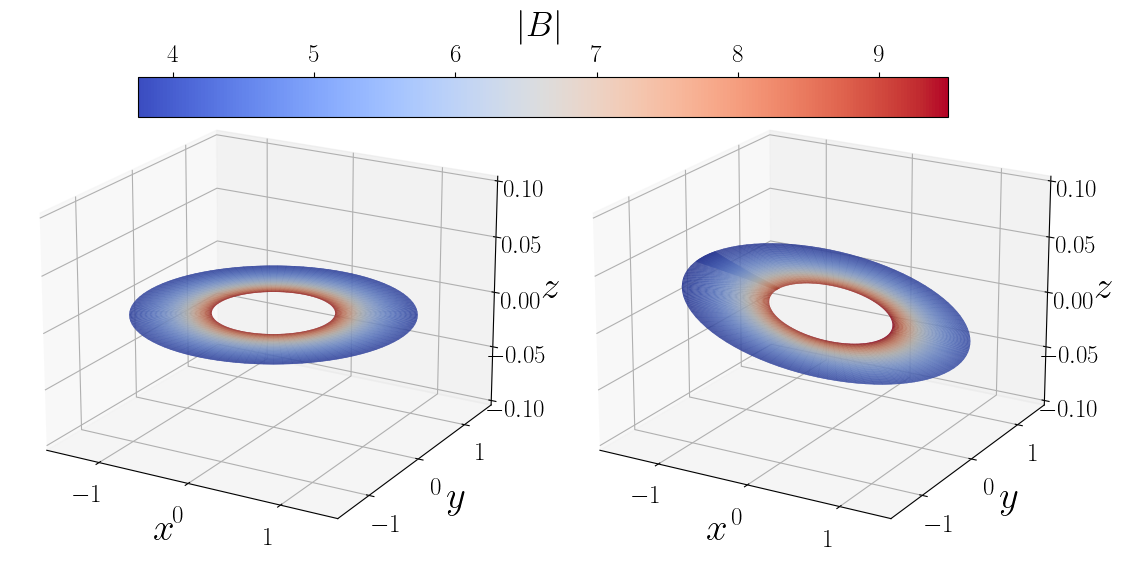

In [11]:
%matplotlib inline

from matplotlib import cm

tick_labelsize = 18 #10, 20
axes_labelsize = 28
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

sigma_xMesh = np.reshape(root[:,0]*np.cos(root[:,1]), (res_guess, res_guess))
sigma_yMesh = np.reshape(root[:,0]*np.sin(root[:,1]), (res_guess, res_guess))
sigma_zMesh = np.reshape(root[:,2], (res_guess, res_guess))
sigma_signMesh = np.reshape(root_sign, (res_guess, res_guess))
sigma_field_mag = np.reshape(toy_tokamak.field_mag(root, field_parameters), \
                             (res_guess, res_guess))

# sigmaPlus_signMesh = np.ma.masked_where(sigma_signMesh > 0, sigma_signMesh)
sigmaMinus_xMesh = np.ma.array(sigma_xMesh, mask = sigma_signMesh < 0)
sigmaMinus_yMesh = np.ma.array(sigma_yMesh, mask = sigma_signMesh < 0)
sigmaMinus_zMesh = np.ma.array(sigma_zMesh, mask = sigma_signMesh < 0)

sigmaPlus_xMesh = np.ma.array(sigma_xMesh, mask = sigma_signMesh > 0)
sigmaPlus_yMesh = np.ma.array(sigma_yMesh, mask = sigma_signMesh > 0)
sigmaPlus_zMesh = np.ma.array(sigma_zMesh, mask = sigma_signMesh > 0)

sigma_xMesh_unpert = np.reshape(points_cyl_guess[:,0]*np.cos(points_cyl_guess[:,1]), \
                               (res_guess, res_guess))
sigma_yMesh_unpert = np.reshape(points_cyl_guess[:,0]*np.sin(points_cyl_guess[:,1]), \
                               (res_guess, res_guess))
sigma_zMesh_unpert = np.reshape(points_cyl_guess[:,2], (res_guess, res_guess))
sigma_unpert_field_mag = np.reshape(toy_tokamak.field_mag(points_cyl_guess, field_parameters), \
                             (res_guess, res_guess))

#3D plot of the sigma surface
fig = plt.figure(figsize=(12, 6), dpi=100)

ax1 = fig.add_subplot(121, projection='3d')
# ax = toy_tokamak.plot_torus(50, majorRad, minorRad, ax)
# scaled_field_val = (sigma_field_mag - np.amin(sigma_field_mag))/np.amax(sigma_field_mag)
scaled_field_val = sigma_field_mag
norm = mpl.colors.Normalize(vmin=np.amin(scaled_field_val), vmax=np.amax(scaled_field_val))
sigma_unpert_plot = ax1.plot_surface(sigma_xMesh_unpert, sigma_yMesh_unpert, sigma_zMesh_unpert, \
                rstride=1, cstride=1, \
                facecolors = cm.coolwarm(norm(sigma_unpert_field_mag)), linewidth = 0.1, \
                alpha = 1.0, antialiased = True)

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax1.set_zlim(-0.1,0.1)
ax1.view_init(20, -60)
# sm = plt.cm.ScalarMappable(cmap = cm.coolwarm, norm=norm)
# sm.set_clim(vmin = np.min(scaled_field_val), vmax = np.max(scaled_field_val))
# cbar = fig.colorbar(sigma_pert_plot, ax = ax, shrink = 0.5)
# cbar = fig.colorbar(sm, ax = ax1, shrink = 0.5, location = 'top', pad=0.001)
# cbar.ax1.set_title(r'$|B|$', fontsize = 15)

ax2 = fig.add_subplot(122, projection='3d')
sigma_pert_plot = ax2.plot_surface(sigma_xMesh, sigma_yMesh, sigma_zMesh, rstride=1, cstride=1, \
                                  facecolors = cm.coolwarm(norm(sigma_field_mag)), linewidth = 0.1, \
                                  alpha = 1.0, antialiased = True)

# ax.scatter3D(points_cyl[:,0]*np.cos(points_cyl[:,1]), \
#              points_cyl[:,0]*np.sin(points_cyl[:,1]), \
#              points_cyl[:,2], s = 10)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_zlabel(r'$z$')
# ax.set_zlim(-1,1)
ax2.set_zlim(-0.1,0.1)
# ax.view_init(27, -75)
# ax.view_init(37, -115)
ax2.view_init(20, -60)
# sm = plt.cm.ScalarMappable(cmap = cm.coolwarm, norm=norm)
# sm.set_clim(vmin = np.min(scaled_field_val), vmax = np.max(scaled_field_val))
# cbar = fig.colorbar(sigma_pert_plot, ax = ax, shrink = 0.5)
# cbar = fig.colorbar(sm, ax = ax, shrink = 0.5, location='top', pad=0.001)
# cbar.ax.set_title(r'$|B|$', fontsize = 15)

fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    wspace=0.05, hspace=0.02)
sm = plt.cm.ScalarMappable(cmap = cm.coolwarm, norm=norm)
cbar = fig.colorbar(sm, ax = [ax1, ax2], shrink = 0.75, location='top', \
             orientation='horizontal', pad=-0.1)
cbar.ax.set_title(r'$|B|$', fontsize = 25)
# fig.tight_layout(pad=0.01)


plt.savefig('sigma_surface_formI_C%.2f'%(field_parameters[1]) + \
            'epsilon%.2f'%(field_parameters[2]) + '-3D.pdf',bbox_inches = 'tight')
# plt.savefig('sigma_surface_formI_C%.2f'%(field_parameters[1]) + \
#             'epsilon%.2f'%(field_parameters[2]) + '_3D.png',dpi = 200, bbox_inches = 'tight')


In [8]:

fig = plt.figure(figsize=(8,8), dpi = 100)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.contour(sigma_xMesh, sigma_yMesh, sigma_field_mag, 50, colors = 'black')
# ax.contourf(sigma_xMesh, sigma_yMesh, sigma_zMesh, 20, alpha = 0.8, colors = 'gray')
ax.contourf(sigmaMinus_xMesh, sigmaMinus_yMesh, sigmaMinus_zMesh, 20, alpha = 0.8, colors = 'green')
ax.contourf(sigmaPlus_xMesh, sigmaPlus_yMesh, sigmaPlus_zMesh, 20, alpha = 0.8, colors = 'red')
# ax.contourf(sigma_xMesh[sigmaMinus_signMesh], sigma_yMesh[sigmaMinus_signMesh, \
#             sigma_zMesh[sigmaMinus_signMesh], 20, alpha = 0.8, colors = 'gray')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# plt.savefig('sigma_surface_formI_C%.2f'%(field_parameters[1]) + \
#             'epsilon%.2f'%(field_parameters[2]) + '.pdf',bbox_inches = 'tight')
# plt.savefig('sigma_surface_formI_C%.2f'%(field_parameters[1]) + \
#             'epsilon%.2f'%(field_parameters[2]) + '.png',dpi = 200,bbox_inches = 'tight')
plt.show()

In [6]:
print(np.max(sigma_field_mag),np.min(sigma_field_mag))
# plt.plot(scaled_field_val)

9.339884216142774 3.8456460618855552


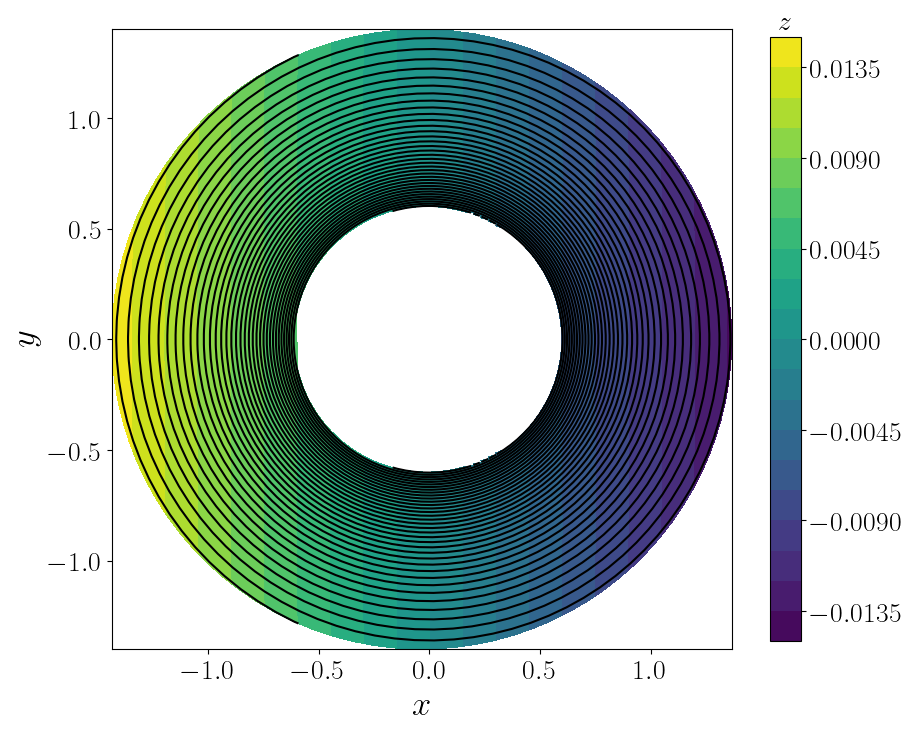

In [7]:
# Visualize the final surface as a triangulation
%matplotlib inline
import matplotlib.tri as tri

triang = tri.Triangulation(sigma_xMesh.flatten(), sigma_yMesh.flatten())

# Mask off unwanted triangles.
xmid = sigma_xMesh.flatten()[triang.triangles].mean(axis=1)
ymid = sigma_yMesh.flatten()[triang.triangles].mean(axis=1)
# mask = np.where(sigmaMinus_xMesh**2 + sigmaMinus_yMesh**2 < min_radius**2, 1, 0)
mask = np.where(xmid**2 + ymid**2 < (majorRad - minorRad)*(majorRad - minorRad), 1, 0)
triang.set_mask(mask)

fig = plt.figure(figsize=(10,10), dpi = 100)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
# ax.triplot(triang,'-bo',ms=1)
# tcf = ax.tricontourf(triang,sigma_zMesh.flatten(),50)
tcf = ax.tricontour(triang,sigma_field_mag.flatten(), 50, colors='k')
tcf_z = ax.tricontourf(triang, sigma_zMesh.flatten(), 20)
# cbar = fig.colorbar(tcf, ax = ax, shrink = 0.8)
# cbar.ax.set_title(r'$|B|$', fontsize = 20)
cbar = fig.colorbar(tcf_z, ax = ax, shrink = 0.8)
cbar.ax.set_title(r'$z$', fontsize = 20)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
# plt.savefig('sigmaMinus_formI_C%.2f'%(field_parameters[1]) + \
#             'epsilon%.2f'%(field_parameters[2]) + '_z-modB.pdf',bbox_inches = 'tight')
plt.show()


### Check: root of $|B|^\prime$ and sign of $|B|^{\prime \prime}$ agree for the axisymmetric case

In [59]:
idx = 120
print(root[idx,0] - majorRad, root[idx,2]/(root[idx,0] - majorRad)**2)
print('Expression obtained by hand:%.16f'%((root[idx,0] - majorRad)/(root[idx,0]**2*np.sqrt(field_parameters[1]**2 \
                        + (root[idx,0] - majorRad)**2))))
print('Expression obtained using symbolic calculation:%.16f'%(modBDoubleprime_l(root[idx,0], root[idx,1], \
                        root[idx,2], field_parameters[0], field_parameters[1], field_parameters[2])))


-0.479597459043126 -0.21628453864986955
Expression obtained by hand:-0.3207675873204938
Expression obtained using symbolic calculation:0.2969966513213749


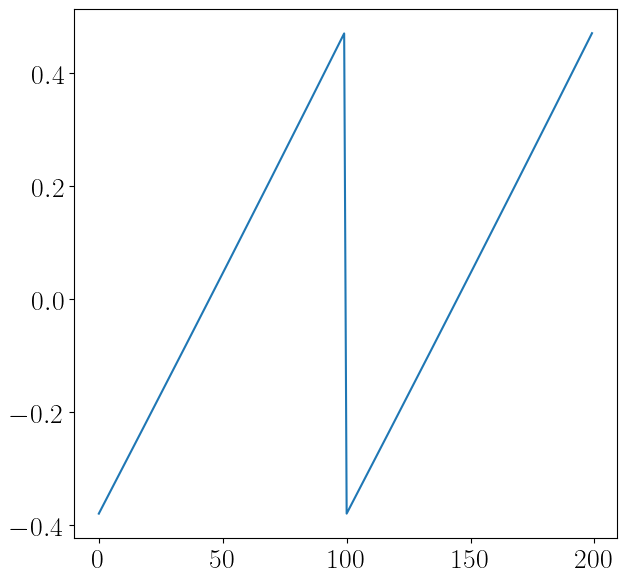

In [32]:
%matplotlib inline

plt.subplots(figsize = (7,7), dpi = 100)
plt.plot(root[:200,0] - majorRad)
# plt.plot(root_sign)
# plt.plot(np.zeros((res_guess*res_guess,1)))


In [ ]:
# import numpy as np
# from numpy import sin, cos, pi
# from skimage import measure
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# def fun(x, y, z):
#     return cos(x) + cos(y) + cos(z)

# x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
# vol = fun(x, y, z)
# iso_val=0.0
# verts, faces, _, _ = measure.marching_cubes(vol, iso_val, spacing=(0.1, 0.1, 0.1))

# fig = plt.figure(figsize = (7,7))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
#                 cmap = cm.plasma, lw=1)
# plt.show()

# theta, phi = np.mgrid[0:2*np.pi:resolution*1j, 0:2*np.pi:resolution*1j]
# xMesh = (majorRad + minorRad*np.cos(phi))*np.cos(theta)
# yMesh = (majorRad + minorRad*np.cos(phi))*np.sin(theta)
# zMesh = minorRad*np.sin(phi)

# x, y, z = np.pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
# vol = fun(x, y, z)
# iso_val=0.0
# verts, faces, _, _ = measure.marching_cubes(vol, iso_val, spacing=(0.1, 0.1, 0.1))

# fig = plt.figure(figsize = (7,7))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
#                 cmap = cm.plasma, lw=1)
# plt.show()

In [10]:
# !python -m pip install -U scikit-image

import matplotlib
import skimage
import numpy as np
print(matplotlib.__version__)
print(np.__version__)
print(skimage.__version__)


3.5.0
1.21.5
0.19.2


__Partitioning the Sigma surface based on the sign of the $|B|^{\prime \prime}$__

In [31]:
%matplotlib

sigmaMinus = root[np.argwhere(root_sign < 0)[:,0],:]
sigmaPlus = root[np.argwhere(root_sign < 0)[:,0],:]

# saving:
f = open("sigma_surface_formI_C%.2f"%(field_parameters[1]) + \
            "epsilon%.2f"%(field_parameters[2]) + "_res%03d"%(res_guess) + ".txt", "w")
f.write("# R phi z\n")        # column names
np.savetxt(f, np.array(sigmaMinus))
    
sigmaMinus_xGrid = sigmaMinus[:,0]*np.cos(sigmaMinus[:,1])
sigmaMinus_yGrid = sigmaMinus[:,0]*np.sin(sigmaMinus[:,1])
sigmaMinus_zGrid = sigmaMinus[:,2]
sigmaMinus_field_mag = toy_tokamak.field_mag(sigmaMinus, field_parameters)


# norm = mpl.colors.Normalize(vmin=np.amin(sigmaMinus_field_mag), vmax=np.amax(sigmaMinus_field_mag))
# fig = plt.figure(figsize=(6,6), dpi=150)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(sigmaMinus_xMesh, sigmaMinus_yMesh, sigmaMinus_zMesh, linewidth = 0.2, antialiased = True)
# ax.plot_trisurf(sigmaMinus_xGrid, sigmaMinus_yGrid, sigmaMinus_zGrid, cmap='viridis', \
#                 linewidth=0.1, edgecolor='none')


Using matplotlib backend: MacOSX


In [ ]:
# plt.plot(np.fmod(root[:,1],2*np.pi),'.r')
plt.plot(root[:,1])

In [9]:
# !pip install matplotlib==3.5.0

In [10]:
np.size(sigmaMinus)

3753

## Resolved issues

__The 3D surface doesn't seem to render well due to unwanted triangles being connected.__